# Anathi Hlaula
### The Objective: Automating Cancer Prediction with High Accuracy

In [1]:
import numpy as np
import tensorflow as tf
import os #interacting with the operating system
import cv2 #open computer vision
import matplotlib.pyplot as plt

#for Model building 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tqdm
from PIL import Image
import io
import ipywidgets as widgets

### Folder Paths 

In [2]:
X_train = []
Y_train = []
image_size = 150
labels = ['Normal','Type 1','Type 2','Type 3']
for i in labels:
    folderPath = os.path.join('train/',i) #the folder path for the train dataset
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j)) # read the folder and the image content found in the folder
        img = cv2.resize(img,(image_size,image_size)) #image resize 
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('test/',i) #test data folder path
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [3]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape #this will give us the contents of the dataset


(928, 150, 150, 3)

### Train Test split

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=101)

In [5]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

### Model Building 

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax')) #we are using softmax as the activation param because we are dealing with probability problem 
#as to whether the image belongs to one of the labels or not

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [8]:
model.compile('Adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

### Model Training

In [9]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30


21/21 [==============================] - 63s 3s/step - loss: 5.7066 - accuracy: 0.2969 - val_loss: 1.3440 - val_accuracy: 0.3600
Epoch 2/30
21/21 [==============================] - 60s 3s/step - loss: 1.3408 - accuracy: 0.3463 - val_loss: 1.3790 - val_accuracy: 0.3600
Epoch 3/30
21/21 [==============================] - 64s 3s/step - loss: 1.3218 - accuracy: 0.3628 - val_loss: 1.3530 - val_accuracy: 0.3600
Epoch 4/30
21/21 [==============================] - 63s 3s/step - loss: 1.2667 - accuracy: 0.4303 - val_loss: 1.4031 - val_accuracy: 0.3600
Epoch 5/30
21/21 [==============================] - 63s 3s/step - loss: 1.1440 - accuracy: 0.4708 - val_loss: 1.1607 - val_accuracy: 0.3600
Epoch 6/30
21/21 [==============================] - 65s 3s/step - loss: 1.0543 - accuracy: 0.5172 - val_loss: 1.2518 - val_accuracy: 0.3467
Epoch 7/30
21/21 [==============================] - 63s 3s/step - loss: 1.2022 - accuracy: 0.4483 - val_loss: 1.1445 - val_accuracy: 0.3600
Epoch 8/30
21/21 [

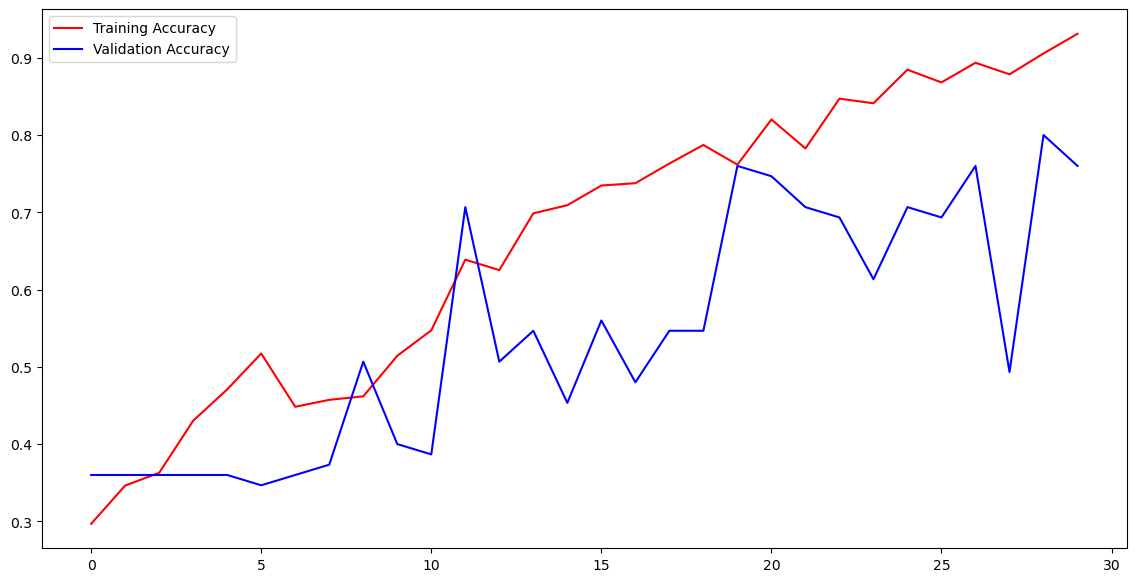

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

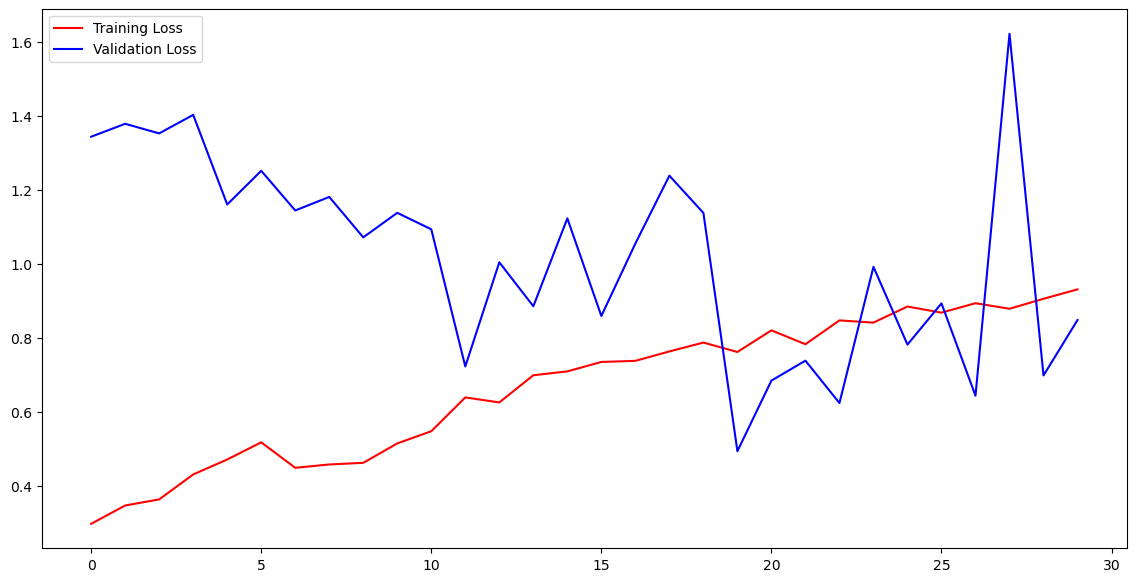

In [12]:
loss = history.history['loss']
val_acc = history.history['val_loss']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Loss")
plt.plot(epochs,val_acc,'b',label="Validation Loss")
plt.legend(loc='upper left')
plt.show()

### Prediction

In [14]:
img = cv2.imread('train/Type 1/000017 (8).png')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [15]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [16]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 376ms/step


1

###### The model gave a 95% accuracy but the my validation loss and the training loss was not decreasing drastically maybe the epochs were to be increased to avoid the overfitting problem.